### Monte Carlo Experiments

In [70]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(0)

#### 1. Fork

In [75]:
z = np.random.normal(size = 5000) # observable confounder
x = z + np.random.normal(size = z.shape[0]) # false cause
y = z + np.random.normal(size = z.shape[0]) # false effect

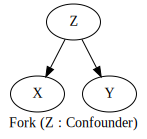

In [76]:
import graphviz as gr

dummy_model = gr.Digraph(
    'G',
    node_attr = {'shape': 'ellipse'}, 
    graph_attr = {'label': 'Fork (Z : Confounder)'}
)

dummy_model.edge('Z', 'X')
dummy_model.edge('Z', 'Y')

dummy_model

In [77]:
# Correct estimate of X -> Y
X = np.column_stack((x, z))
ols1 = sm.OLS(
    y, sm.add_constant(X)
).fit()

In [78]:
print(ols1.summary(xname = ['const','X','Z'], yname = 'Y')) # true negative

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     2520.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:19:56   Log-Likelihood:                -7103.0
No. Observations:                5000   AIC:                         1.421e+04
Df Residuals:                    4997   BIC:                         1.423e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0156      0.014     -1.099      0.2

In [79]:
# Incorrect estimate of X -> Y
ols0 = sm.OLS(
    y, sm.add_constant(x)
).fit()

In [80]:
print(ols0.summary(xname = ['const','X'], yname = 'Y')) # false positive

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     1719.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          3.46e-323
Time:                        00:19:59   Log-Likelihood:                -8107.8
No. Observations:                5000   AIC:                         1.622e+04
Df Residuals:                    4998   BIC:                         1.623e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0093      0.017     -0.536      0.5

Residual Regression

In [87]:
x_model = sm.OLS(
    x, sm.add_constant(z)
).fit()

In [88]:
print(x_model.summary(xname = ['const','Z'], yname = 'X')) # X Model

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     5057.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:35:14   Log-Likelihood:                -7057.6
No. Observations:                5000   AIC:                         1.412e+04
Df Residuals:                    4998   BIC:                         1.413e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0039      0.014      0.281      0.7

In [89]:
y_model = sm.OLS(
    y, sm.add_constant(z)
).fit()

In [90]:
print(y_model.summary(xname = ['const','Z'], yname = 'Y')) # Y Model

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     5041.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:35:31   Log-Likelihood:                -7103.2
No. Observations:                5000   AIC:                         1.421e+04
Df Residuals:                    4998   BIC:                         1.422e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0155      0.014     -1.097      0.2

In [93]:
x_resid = x_model.resid
y_resid = y_model.resid

ols2 = sm.OLS(
    y_resid, sm.add_constant(x_resid)
).fit()

In [94]:
print(ols2.summary(xname = ['const','X_resid'], yname = 'Y_resid'))

                            OLS Regression Results                            
Dep. Variable:                Y_resid   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2242
Date:                Mon, 26 Aug 2024   Prob (F-statistic):              0.636
Time:                        00:40:29   Log-Likelihood:                -7103.0
No. Observations:                5000   AIC:                         1.421e+04
Df Residuals:                    4998   BIC:                         1.422e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.11e-16      0.014  -7.84e-15      1.0

#### 2. Immorality

In [50]:
x = np.random.normal(size = 5000) # false cause
y = np.random.normal(size = x.shape[0]) # false effect
z = x + y + np.random.normal(size = x.shape[0]) # collider

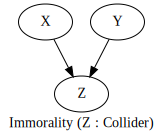

In [51]:
dummy_model = gr.Digraph(
    'G',
    node_attr = {'shape': 'ellipse'}, 
    graph_attr = {'label': 'Immorality (Z : Collider)'}
)

dummy_model.edge('X', 'Z')
dummy_model.edge('Y', 'Z')

dummy_model

In [52]:
# Correct estimate of X -> Y
ols0 = sm.OLS(
    y, sm.add_constant(x)
).fit()

In [53]:
print(ols0.summary(xname = ['const','X'], yname = 'Y')) # true negative

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0007004
Date:                Sun, 25 Aug 2024   Prob (F-statistic):              0.979
Time:                        00:59:02   Log-Likelihood:                -7079.5
No. Observations:                5000   AIC:                         1.416e+04
Df Residuals:                    4998   BIC:                         1.418e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0053      0.014      0.377      0.7

In [54]:
# Incorrect estimate of X -> Y
X = np.column_stack((x, z))
ols1 = sm.OLS(
    y, sm.add_constant(X)
).fit()

In [55]:
print(ols1.summary(xname = ['const','X','Z'], yname = 'Y')) # false positive

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2686.
Date:                Sun, 25 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:59:08   Log-Likelihood:                -5254.4
No. Observations:                5000   AIC:                         1.051e+04
Df Residuals:                    4997   BIC:                         1.053e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0138      0.010      1.412      0.1

#### 3. Chain

In [41]:
x = np.random.normal(size = 5000) # false cause
w = np.random.normal(size = x.shape[0]) # confounder
z = x + w + np.random.normal(size = x.shape[0]) # mediator
y = z + w + np.random.normal(size = x.shape[0]) # effect

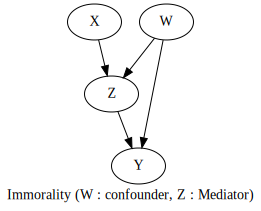

In [44]:
chain_model = gr.Digraph(
    'G',
    node_attr = {'shape': 'ellipse'}, 
    graph_attr = {'label': 'Immorality (W : confounder, Z : Mediator)'}
)

chain_model.edge('X', 'Z')
chain_model.edge('W', 'Z')
chain_model.edge('Z', 'Y')
chain_model.edge('W', 'Y')

chain_model

In [45]:
# Correct estimate of X -> Y
ols1 = sm.OLS(
    y, sm.add_constant(x)
).fit()

In [46]:
print(ols1.summary(xname = ['const', 'X'], yname = 'Y')) # true positive

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     726.1
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.90e-149
Time:                        00:48:17   Log-Likelihood:                -11599.
No. Observations:                5000   AIC:                         2.320e+04
Df Residuals:                    4998   BIC:                         2.322e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.035      0.004      0.9

In [47]:
# Incorrect estimate of X -> Y
X = np.column_stack((x, z))

In [48]:
ols1 = sm.OLS(
    y, sm.add_constant(X)
).fit()

In [49]:
print(ols1.summary(xname = ['const','X','Z'], yname = 'Y')) # false positive

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     9150.
Date:                Sun, 25 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:48:36   Log-Likelihood:                -8089.4
No. Observations:                5000   AIC:                         1.618e+04
Df Residuals:                    4997   BIC:                         1.620e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0276      0.017     -1.602      0.1